<b>Gradient descent </b><br>
Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model. Parameters refer to coefficients in Linear Regression and weights in neural networks.
<br>
<br>
<b>Learning rate :</b><br>
The size of these steps is called the learning rate. With a high learning rate we can cover more ground each step, but we risk overshooting the lowest point since the slope of the hill is constantly changing. With a very low learning rate, we can confidently move in the direction of the negative gradient since we are recalculating it so frequently. A low learning rate is more precise, but calculating the gradient is time-consuming, so it will take us a very long time to get to the bottom.
<br>
<br>
<b>Cost function : </b><br>
A Loss Functions tells us “how good” our model is at making predictions for a given set of parameters. The cost function has its own curve and its own gradients. The slope of this curve tells us how to update our parameters to make the model more accurate.
<br>

<b> Algorithm </b>
<br>


    1. Statndardize values between  0 and 1
    2. Assign random values to A and  B in Y = A + X * B
    3.
        a.Compute SSEi = 1/2 * Sum<0~n>[  (Y-Yp)^2 ]
        b.Compute Error Gradients
            dSSE/dA = -(Y-Yp)
            dSSE/dB = -(Y-Yp)*X
        c.Find new A & B
            New A = A - ( r * dSSE/dA )
            New B = B -( r * dSSE/dB )

        d.Compute SSEi+1

    4. Stop when (| SSEi-SSEi+1 | ) < minimum_margin


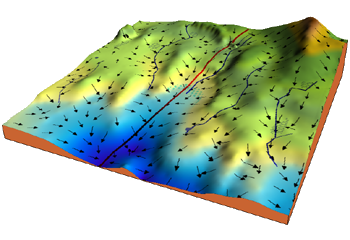

In [14]:
import math
from  IPython.display import Image
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import numpy as np
import os
import random

# Gradient is nothing but finding the slope of the curve

Image(filename=os.getcwd()+"/images/gradient_descent.png")

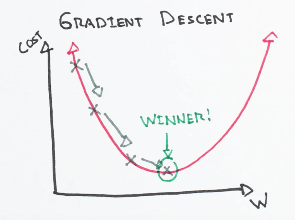

In [3]:
# Gradient Descent performs best when the problem follows a convex curve

Image(filename=os.getcwd()+"/images/gradient_descent_demystified.png")

In [16]:
# Q Code the Gradient Descent Algorithm as described above.

class GradDescent(object):

    def compute(self):
        """This function computes one step in Gradient Descent Algorithm. 
        Iterate over until a-NewA / b-NewB is acceptable.
        """

        X=np.array([1100.0, 1400,1425,1550,1600,1700,1700,1875,2350,2450])
        Y=np.array([199000,245000,319000,240000,312000,279000,310000,308000,405000,324000])

        data_len = len(X)
        scaler= MinMaxScaler()
        scaler2=StandardScaler()
        
        # Statndardize values between  0 and 1
        X = scaler.fit_transform(X.reshape(-1,1))
        Y = scaler.fit_transform(Y.reshape(-1, 1))
        print(" 1. Standardized ", "\n")
        print("X",X)
        print("Y",Y)

        
        #  Assign random values to A and  B in Y = A + X * B        
        a = random.choice([0.35,0.45,0.55,0.65,0.75])
        b = random.choice([0.35,0.45,0.55,0.65,0.75])
        print(" 2. Random values a,b :",a,b, "\n")

        Ypred=[]
        ypred=[]

        # Compute SSEi = 1/2 * Sum<0~n>[  (Y-Yp)^2 ]
        for i in range(0,data_len):
            ypred.append(a + X[i]*b)
            temp = a + X[i] * b
            Ypred.append(   float(   (Y[i]- temp)*(Y[i]- temp) ) )

        #print(Ypred)
        SSE = (sum(Ypred))/2
        print(" 3a.SSE:",SSE)

        dSSEa=[]
        dSSEb=[]
        # Compute Error Gradients
        for i in range(0,data_len):
            dSSEa.append( float( -(Y[i]-ypred[i]) ) )

        for i in range(0,data_len):
            dSSEb.append( float( -(Y[i]-ypred[i])*X[i] ) )

        gradA =sum(dSSEa)
        gradB = sum(dSSEb)
        print("3b. A,B : ",gradA, gradB)
        
        # Find new A & B
        # Learning rate is 0.01
        NewA= a - (0.01 * gradA)
        NewB= b - (0.01 * gradB)
        print(" 3c. NewA,NewB:", a,b)
        
GradDescent().compute()


(' 1. Standardized ', '\n')
('X', array([[0.        ],
       [0.22222222],
       [0.24074074],
       [0.33333333],
       [0.37037037],
       [0.44444444],
       [0.44444444],
       [0.57407407],
       [0.92592593],
       [1.        ]]))
('Y', array([[0.        ],
       [0.22330097],
       [0.58252427],
       [0.19902913],
       [0.54854369],
       [0.38834951],
       [0.53883495],
       [0.52912621],
       [1.        ],
       [0.60679612]]))
(' 2. Random values a,b :', 0.65, 0.55, '\n')
(' 3a.SSE:', 1.1048545317690384)
('3b. A,B : ', 4.389050701186624, 1.8688544621572318)
(' 3c. NewA,NewB:', 0.65, 0.55)
